In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

data_name = "iris"
training_type = ['individial_layers', 'exchange_layers','training_exchange_layers', 'training_exchange_layers_e', 'no_individial_layers', 'no_exchange_layers', 'one_individial_layers']
algorithm = 'qdpso'
tipe = ["training", "test", "val"]

# Training

Individual Layer time (second):  44.10303449999992

Individual Exchange Layer time (second):  43.278475799999796

Concurrence Iter layer Exchange time (second):  15.058500500001173

Concurrence Iter layer and Layer Exchange time (second):  15.165413500002614

Individual Layer time (second):  20.16435949999868

Individual Exchange Layer time (second):  21.871152200000324

Concurrence Iter layer Exchange time (second):  15.2729460999999

Concurrence Iter layer and Layer Exchange time (second):  14.905878900000062

NO Individual Layer time (second):  11.941459500000747

In [2]:
execution_time_ind = np.load(f"../output/{training_type[0]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex = np.load(f"../output/{training_type[1]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex_c = np.load(f"../output/{training_type[2]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_ex_c_ex = np.load(f"../output/{training_type[3]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_nind = np.load(f"../output/{training_type[4]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_exn = np.load(f"../output/{training_type[5]}/{data_name}/{data_name}_start_end_execution_time.npy")
execution_time_one = np.load(f"../output/{training_type[6]}/{data_name}/{data_name}_start_end_execution_time.npy")

print("ONE Individual Layer time (second): ", execution_time_one[2])
print("Individual Layer time (second): ", execution_time_ind[2])
print("NO Individual Layer time (second): ", execution_time_nind[2])
print("Individual Exchange Layer time (second): ", execution_time_ex[2])
print("NO Individual Exchange Layer time (second): ", execution_time_exn[2])
print("Concurrence Iter layer Exchange time (second): ", execution_time_ex_c[2])
print("Concurrence Iter layer and Layer Exchange time (second): ", execution_time_ex_c_ex[2])

ONE Individual Layer time (second):  9.754583900000398
Individual Layer time (second):  20.368196499999613
NO Individual Layer time (second):  11.744021300000895
Individual Exchange Layer time (second):  20.20826319999992
NO Individual Exchange Layer time (second):  12.11876779999875
Concurrence Iter layer Exchange time (second):  15.2729460999999
Concurrence Iter layer and Layer Exchange time (second):  14.905878900000062


In [3]:
def extract_training_data_from_file(filename):
    """Extrae datos de entrenamiento de un archivo CSV."""
    df = pd.read_csv(filename)
    return df[df['Layer'].str.startswith('total_training')]['Duration (seconds)'].values

def visualize_training_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Training': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de entrenamiento al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[0]}_time.csv'  # Utilizamos tipe[0] aquí
        durations = extract_training_data_from_file(file_path)
        
        # Si la lista 'Training Iteration' está vacía, llenarla con los números de iteración
        if not data['Training']:
            data['Training'] = [f'Training {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = {
        'Training': ['Average', 'Std', 'Best', 'Worst'],
        training_types[0]: [df_combined[training_types[0]].mean(), df_combined[training_types[0]].std(), df_combined[training_types[0]].min(), df_combined[training_types[0]].max()],
        training_types[1]: [df_combined[training_types[1]].mean(), df_combined[training_types[1]].std(), df_combined[training_types[1]].min(), df_combined[training_types[1]].max()],
        training_types[2]: [df_combined[training_types[2]].mean(), df_combined[training_types[2]].std(), df_combined[training_types[2]].min(), df_combined[training_types[2]].max()],
        training_types[3]: [df_combined[training_types[3]].mean(), df_combined[training_types[3]].std(), df_combined[training_types[3]].min(), df_combined[training_types[3]].max()],
        training_types[4]: [df_combined[training_types[4]].mean(), df_combined[training_types[4]].std(), df_combined[training_types[4]].min(), df_combined[training_types[4]].max()],
        training_types[5]: [df_combined[training_types[5]].mean(), df_combined[training_types[5]].std(), df_combined[training_types[5]].min(), df_combined[training_types[5]].max()]
    }
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_training_combined_table(training_type, data_name, algorithm, tipe)

,Training,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e,no_individial_layers,no_exchange_layers
0,Training 1,1.364461,1.332803,0.933897,0.910452,0.781532,0.795768
1,Training 2,1.351698,1.366533,0.950602,0.938140,0.778355,0.813831
2,Training 3,1.464162,1.346622,0.951797,0.931445,0.781070,0.807176
3,Training 4,1.350156,1.334828,0.959492,0.931260,0.777949,0.804957
4,Training 5,1.362906,1.361326,1.000624,0.941627,0.781880,0.803342
5,Training 6,1.356651,1.340116,0.939049,0.932207,0.778952,0.802311
6,Training 7,1.343047,1.341031,0.972130,0.939671,0.776659,0.801996
7,Training 8,1.355447,1.343206,0.967097,0.943361,0.774571,0.803986
8,Training 9,1.324496,1.343888,1.011162,0.922039,0.787058,0.799943
9,Training 10,1.328803,1.338473,0.931666,0.922238,0.780019,0.806757


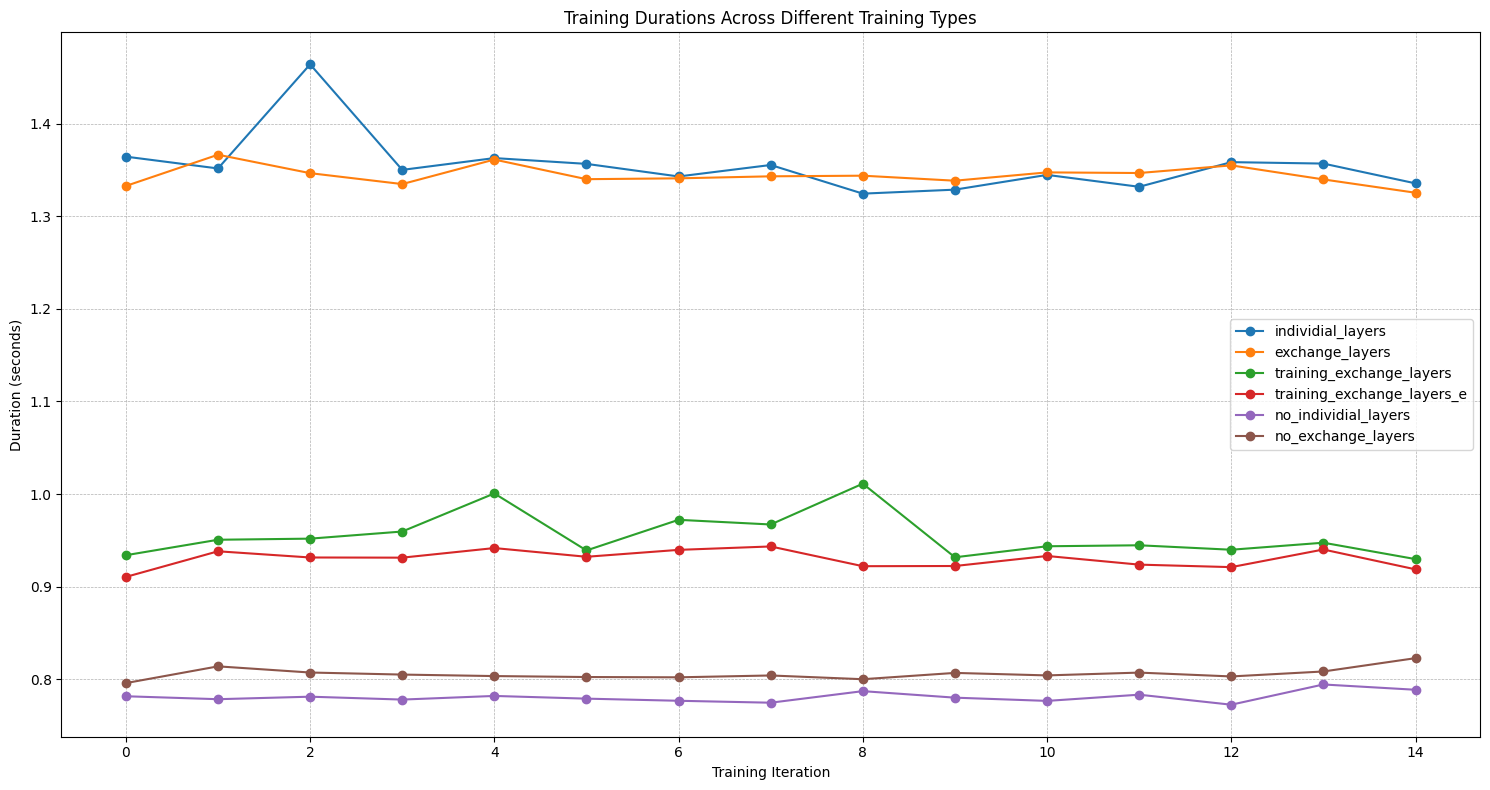

In [4]:
def visualize_training_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[0]}_time.csv'
        durations = extract_training_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Training Durations Across Different Training Types')
    plt.xlabel('Training Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_training_graph(training_type, data_name, algorithm, tipe)

# Testing

In [5]:
def extract_testing_data_from_file(filename):
    """Extrae datos de testeo de un archivo CSV."""
    df = pd.read_csv(filename)
    return df[df['Layer'].str.startswith('total_test')]['Duration (seconds)'].values

def visualize_testing_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Testing': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de testeo al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[1]}_time.csv'  # Utilizamos tipe[1] aquí
        durations = extract_testing_data_from_file(file_path)
        
        # Si la lista 'Testing Iteration' está vacía, llenarla con los números de iteración
        if not data['Testing']:
            data['Testing'] = [f'Testing {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = {
        'Testing': ['Average', 'Std', 'Best', 'Worst'],
        training_types[0]: [df_combined[training_types[0]].mean(), df_combined[training_types[0]].std(), df_combined[training_types[0]].min(), df_combined[training_types[0]].max()],
        training_types[1]: [df_combined[training_types[1]].mean(), df_combined[training_types[1]].std(), df_combined[training_types[1]].min(), df_combined[training_types[1]].max()],
        training_types[2]: [df_combined[training_types[2]].mean(), df_combined[training_types[2]].std(), df_combined[training_types[2]].min(), df_combined[training_types[2]].max()],
        training_types[3]: [df_combined[training_types[3]].mean(), df_combined[training_types[3]].std(), df_combined[training_types[3]].min(), df_combined[training_types[3]].max()],
        training_types[4]: [df_combined[training_types[4]].mean(), df_combined[training_types[4]].std(), df_combined[training_types[4]].min(), df_combined[training_types[4]].max()],
        training_types[5]: [df_combined[training_types[5]].mean(), df_combined[training_types[5]].std(), df_combined[training_types[5]].min(), df_combined[training_types[5]].max()]
    }
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_testing_combined_table(training_type, data_name, algorithm, tipe)


,Testing,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e,no_individial_layers,no_exchange_layers
0,Testing 1,0.000129,0.000165,0.000066,0.000061,0.000055,0.000058
1,Testing 2,0.000094,0.000128,0.000061,0.000062,0.000053,0.000059
2,Testing 3,0.000094,0.000093,0.000060,0.000064,0.000109,0.000055
3,Testing 4,0.000128,0.000092,0.000064,0.000061,0.000056,0.000052
4,Testing 5,0.000094,0.000383,0.000062,0.000069,0.000061,0.000053
5,Testing 6,0.000087,0.000089,0.000063,0.000068,0.000047,0.000055
6,Testing 7,0.000096,0.000426,0.000072,0.000058,0.000048,0.000064
7,Testing 8,0.000086,0.000100,0.000068,0.000069,0.000055,0.000054
8,Testing 9,0.000163,0.000091,0.000056,0.000055,0.000052,0.000057
9,Testing 10,0.000090,0.000092,0.000061,0.000067,0.000049,0.000059


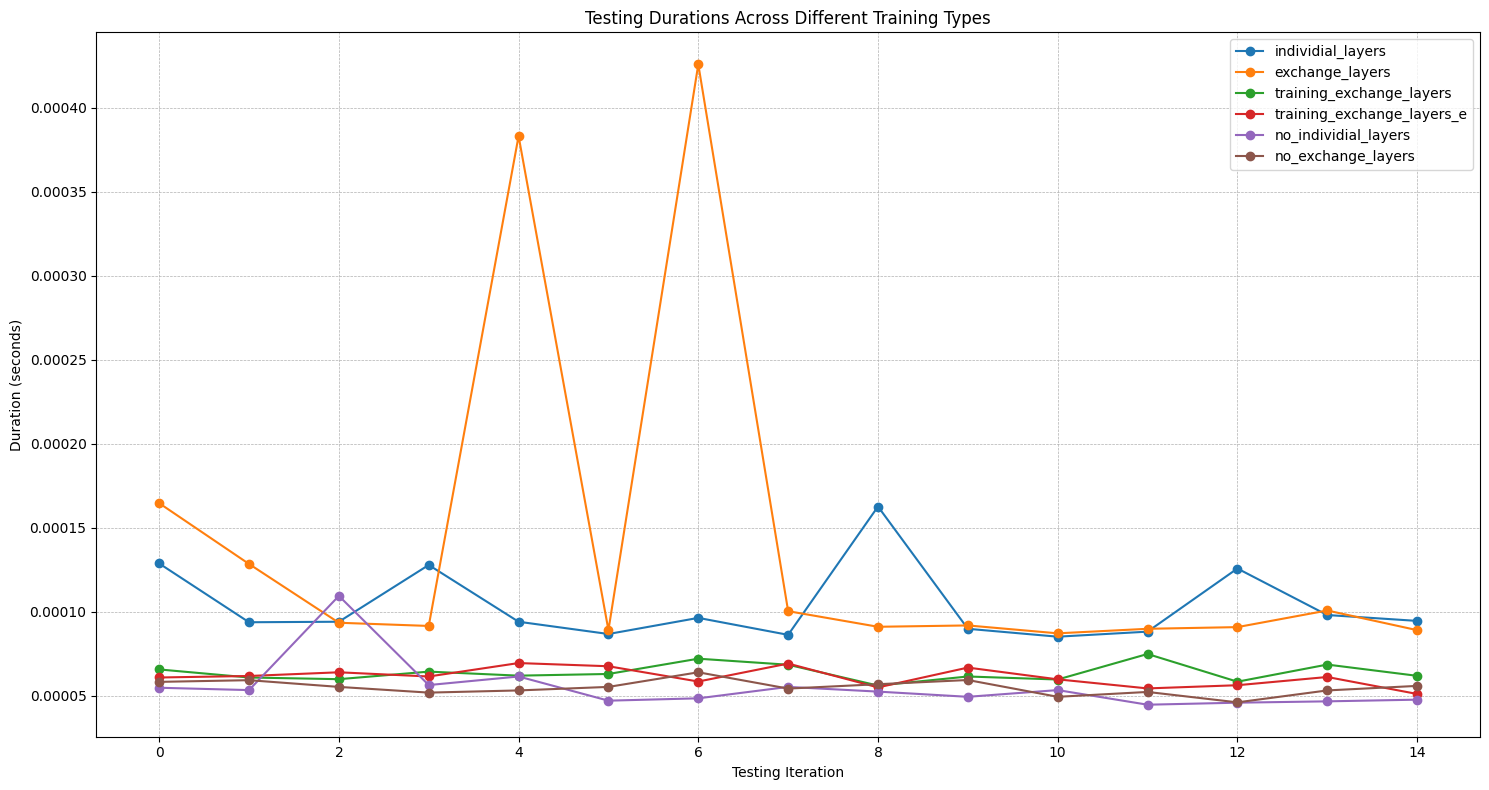

In [6]:
def visualize_testing_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[1]}_time.csv'
        durations = extract_testing_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Testing Durations Across Different Training Types')
    plt.xlabel('Testing Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_testing_graph(training_type, data_name, algorithm, tipe)

# Validation

In [7]:
def extract_validation_data_from_file(filename):
    """Extrae datos de validación de un archivo CSV."""
    df = pd.read_csv(filename)
    return df[df['Layer'].str.startswith('total_val')]['Duration (seconds)'].values

def visualize_validation_combined_table(training_types, data_name, algorithm, tipe):
    # Crear un diccionario para albergar los datos
    data = {'Validation': []}
    
    # Para cada tipo de entrenamiento, extraer y agregar los datos de validación al diccionario
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[2]}_time.csv'  # Utilizamos tipe[2] aquí
        durations = extract_validation_data_from_file(file_path)
        
        # Si la lista 'Validation Iteration' está vacía, llenarla con los números de iteración
        if not data['Validation']:
            data['Validation'] = [f'Validation {i+1}' for i in range(len(durations))]
        
        data[training_type] = durations

    # Crear el DataFrame
    df_combined = pd.DataFrame(data)
    
    # Crear un DataFrame para "Average", "Std", "Best", y "Worst"
    summary_data = {
        'Validation': ['Average', 'Std', 'Best', 'Worst'],
        training_types[0]: [df_combined[training_types[0]].mean(), df_combined[training_types[0]].std(), df_combined[training_types[0]].min(), df_combined[training_types[0]].max()],
        training_types[1]: [df_combined[training_types[1]].mean(), df_combined[training_types[1]].std(), df_combined[training_types[1]].min(), df_combined[training_types[1]].max()],
        training_types[2]: [df_combined[training_types[2]].mean(), df_combined[training_types[2]].std(), df_combined[training_types[2]].min(), df_combined[training_types[2]].max()],
        training_types[3]: [df_combined[training_types[3]].mean(), df_combined[training_types[3]].std(), df_combined[training_types[3]].min(), df_combined[training_types[3]].max()],
        training_types[4]: [df_combined[training_types[4]].mean(), df_combined[training_types[4]].std(), df_combined[training_types[4]].min(), df_combined[training_types[4]].max()],
        training_types[5]: [df_combined[training_types[5]].mean(), df_combined[training_types[5]].std(), df_combined[training_types[5]].min(), df_combined[training_types[5]].max()]
    }
    df_summary = pd.DataFrame(summary_data)

    # Concatenar el DataFrame original con el resumen
    df_combined = pd.concat([df_combined, df_summary], ignore_index=True)
    
    # Mostrar el DataFrame
    display(df_combined)

visualize_validation_combined_table(training_type, data_name, algorithm, tipe)



,Validation,individial_layers,exchange_layers,training_exchange_layers,training_exchange_layers_e,no_individial_layers,no_exchange_layers
0,Validation 1,0.000051,0.000064,0.000061,0.000055,0.000049,0.000056
1,Validation 2,0.000056,0.000060,0.000052,0.000073,0.000055,0.000057
2,Validation 3,0.000062,0.000061,0.000048,0.000053,0.000078,0.000055
3,Validation 4,0.000061,0.000062,0.000061,0.000059,0.000069,0.000052
4,Validation 5,0.000055,0.000060,0.000057,0.000056,0.000060,0.000053
5,Validation 6,0.000056,0.000069,0.000059,0.000061,0.000047,0.000088
6,Validation 7,0.000054,0.000104,0.000058,0.000054,0.000046,0.000064
7,Validation 8,0.000053,0.000059,0.000057,0.000057,0.000057,0.000056
8,Validation 9,0.000055,0.000068,0.000053,0.000052,0.000053,0.000054
9,Validation 10,0.000054,0.000068,0.000056,0.000079,0.000047,0.000056


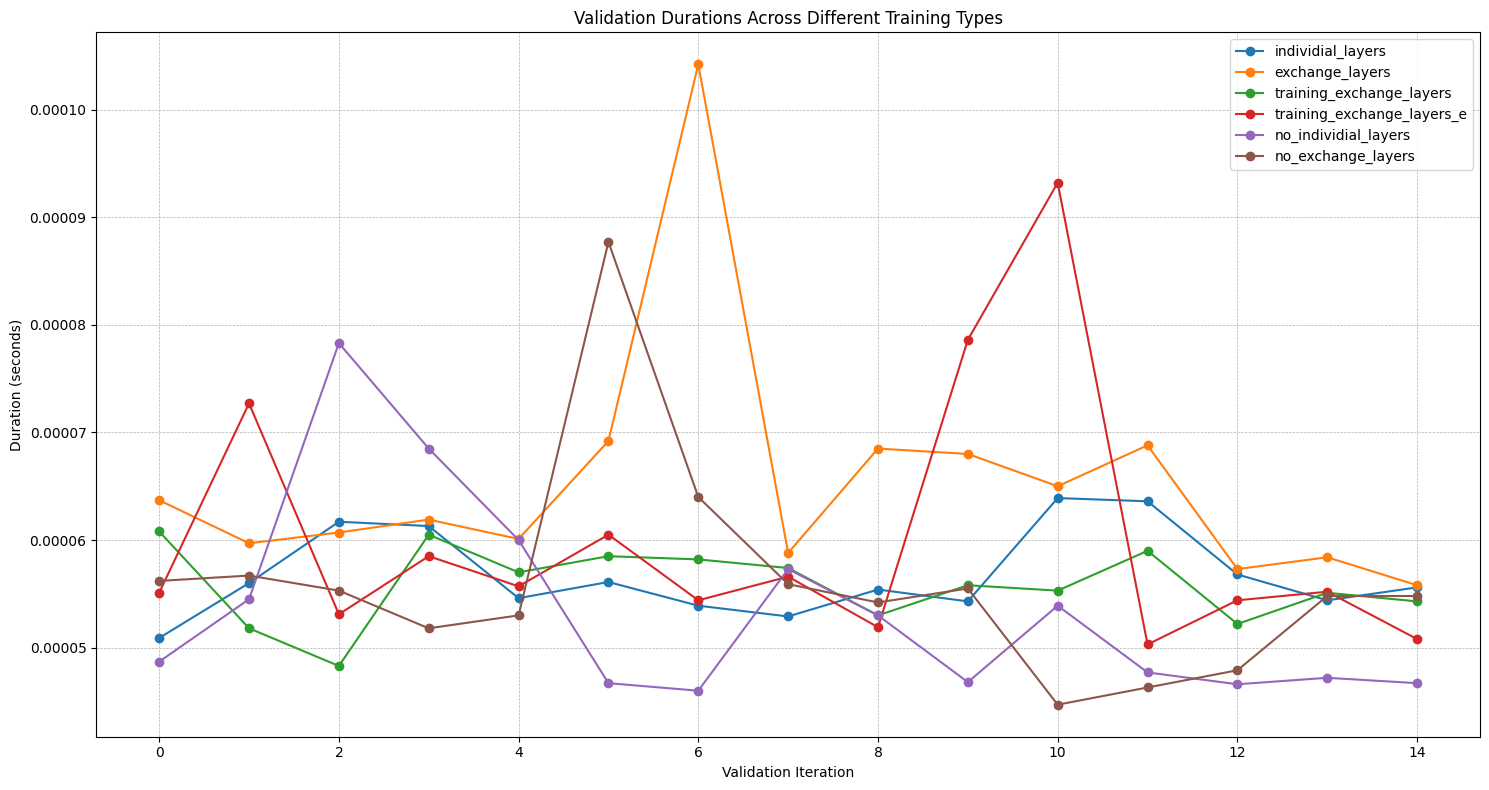

In [8]:
def visualize_validation_graph(training_types, data_name, algorithm, tipe):
    # Crear un gráfico
    plt.figure(figsize=(15, 8))
    
    for training_type in training_types:
        file_path = f'../output/{training_type}/{data_name}/{algorithm}_{data_name}_{tipe[2]}_time.csv'
        durations = extract_validation_data_from_file(file_path)
        
        plt.plot(durations, label=training_type, marker='o')
        
    plt.title('Validation Durations Across Different Training Types')
    plt.xlabel('Validation Iteration')
    plt.ylabel('Duration (seconds)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

visualize_validation_graph(training_type, data_name, algorithm, tipe)
